In [239]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [240]:
matplotlib.rcParams.update({'font.size':18}) 
matplotlib.rcParams.update({'font.family':'serif'})

Reading in files:

In [241]:
Kep_ID, Pair_ID, Gal_Prob, Photo_Dist, Pair_Dist = np.loadtxt ('kolby-data.txt', usecols=(0,1,2,3,4), unpack=True)

In [242]:
print (Kep_ID)

[ 7090710.  7090515.  7659417. ...,  8653307.  8588807.  8588660.]


In [243]:
print (Pair_ID)

[    68.     68.     85. ...,  35228.  35247.  35247.]


In [244]:
print (Gal_Prob)

[ 0.003  0.003  0.    ...,  0.025  0.003  0.003]


In [245]:
print (Photo_Dist)

[ 1501.923    1219.7118    274.97043 ...,   373.87689   361.51929
   375.18808]


In [246]:
print (Pair_Dist)

[ 294.09899   294.09899    21.336109 ...,  268.53222   102.38771   102.38771 ]


Tried using np.loadtxt on 'kic_lflare.csv', but kept getting "Value Error: could not convert string to float"

Using np.genfromtxt seemed to work however:

In [247]:
row, Lfl_Lbol, giclr, kicnum = np.genfromtxt('kic_lflare.csv', delimiter = ',', unpack = True)

In [248]:
print (row)

[  0.00000000e+00   1.00000000e+00   2.00000000e+00 ...,   2.07614000e+05
   2.07615000e+05   2.07616000e+05]


In [249]:
print (Lfl_Lbol)

[  0.00000000e+00   5.38317494e-04   0.00000000e+00 ...,   0.00000000e+00
  -1.87030061e-08   0.00000000e+00]


In [250]:
print (giclr)

[ 0.265    -0.087     0.677999 ...,  0.623     0.622001  0.931   ]


In [251]:
print (kicnum)

[ 10000009.  10000056.  10000069. ...,   9999914.   9999949.   9999979.]


In [252]:
m = np.array(np.zeros(len(Kep_ID)), dtype='int')

for k in range (len(Kep_ID)):
    x = np.where((Kep_ID[k] == kicnum))
    m[k] = x[0]
#     Kep_ID == kicnum[x]
    
m
# in database speak, this a Join (Inner Join)
# Kep_ID == kicnum[m]


array([132675, 132661, 144449, ..., 172529, 170764, 170761])

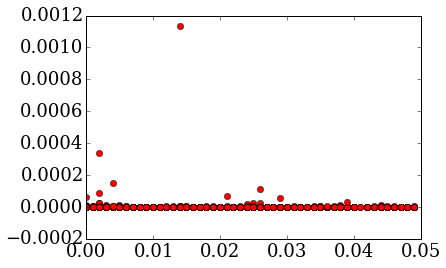

In [253]:
plt.plot(Gal_Prob, Lfl_Lbol[m], 'ro')

In [254]:
kicnum[m] == Kep_ID

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [255]:
len(Pair_ID)

1094

In [256]:
a = np.arange(0,1094,2)
b = np.arange(1,1094,2)

In [257]:
len(a)

547

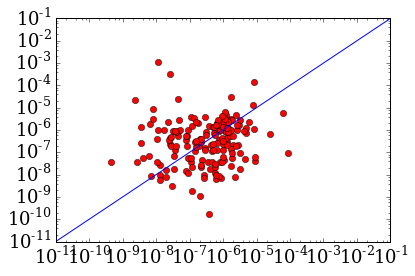

In [258]:
plt.plot(Lfl_Lbol[m][a],Lfl_Lbol[m][b], 'ro')
# plt.xlim(-.000001,.00002)
# plt.ylim(-.000001,.00002)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([0,1], [0,1])
plt.xscale('log')
plt.yscale('log')

In [259]:
Good_both_a = np.where((Lfl_Lbol[m][a]>1e-7)  & (Gal_Prob[a]>0.001))
Good_both_b = np.where((Lfl_Lbol[m][b]>1e-7)  & (Gal_Prob[b]>0.001))

print(len(Lfl_Lbol[m][a][Good_both_a]))
print(len(Lfl_Lbol[m][b][Good_both_b]))
print(Lfl_Lbol[m][a][Good_both_a])
print(Lfl_Lbol[m][b][Good_both_b])


184
179
[  5.68505135e-07   7.66363461e-07   2.32083298e-07   3.82910544e-07
   1.48591206e-07   1.29518795e-06   5.99905899e-07   3.02835234e-07
   3.07120079e-06   1.77749600e-07   4.74031857e-07   2.93211796e-07
   6.68046617e-07   1.12582046e-06   2.11714182e-07   9.44332520e-07
   6.82926868e-07   2.21113370e-06   8.29187279e-06   5.00695370e-07
   2.86567863e-06   1.94843857e-07   1.32159081e-06   9.41127402e-07
   8.93729741e-06   2.24727101e-06   1.18517686e-06   3.12649893e-07
   1.57656116e-07   3.05835892e-07   7.33579158e-07   2.89507266e-07
   3.90970700e-07   5.99508857e-07   1.08161227e-06   3.99900165e-07
   1.01305053e-06   7.96216857e-07   9.78251141e-07   1.08856924e-06
   3.42687467e-07   8.33722601e-06   1.14361502e-07   1.53220450e-06
   5.24084304e-07   2.61715363e-07   3.46674448e-07   3.13074655e-06
   4.54355888e-07   2.03681339e-07   1.67079361e-06   8.65989527e-07
   2.57118042e-05   2.83445420e-07   1.80623357e-07   6.83108073e-07
   1.10124391e-06   7.5524

In [260]:
np.size(m)

1094

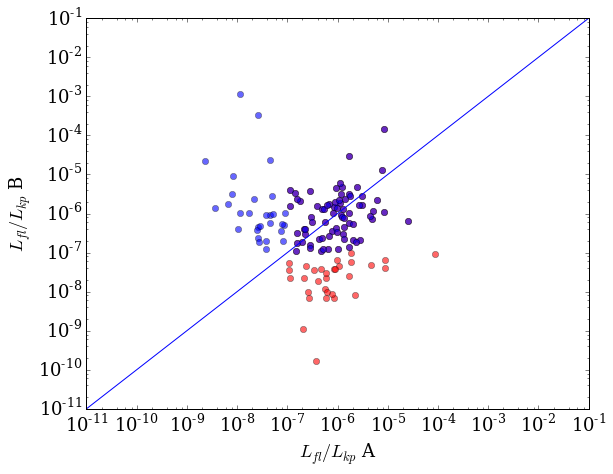

In [276]:
plt.figure(figsize=(9,7))
plt.plot(Lfl_Lbol[m][a][Good_both_a], Lfl_Lbol[m][b][Good_both_a], 'ro', alpha = 0.6)
plt.plot(Lfl_Lbol[m][a][Good_both_b], Lfl_Lbol[m][b][Good_both_b], 'bo', alpha = 0.6)
plt.xlim(1e-11, 1e-1)
plt.ylim(1e-11,  1e-1)
plt.plot([1e-11,1], [1e-11,1])
# plt.plot([1e-11,1]*2, [1e-11,1]*2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$L_{fl}/L_{kp}$ A')
plt.ylabel('$L_{fl}/L_{kp}$ B')
plt.savefig('AB.png', dpi=1000)

/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


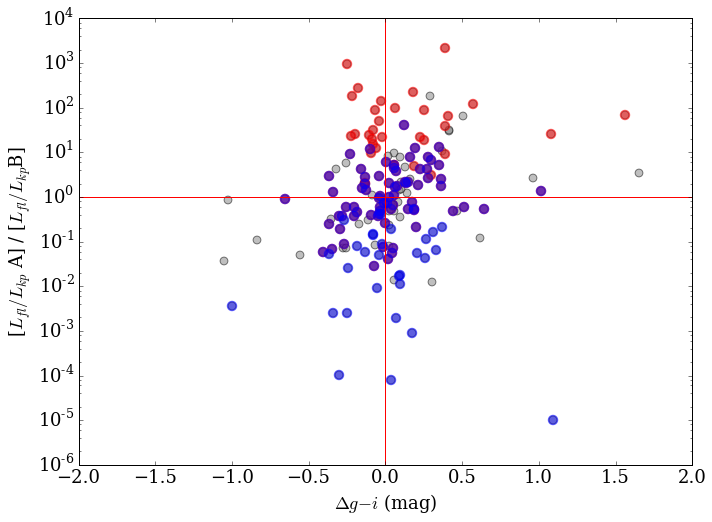

In [275]:
plt.figure(figsize=(11,8))
plt.scatter(giclr[m][a] - giclr[m][b],Lfl_Lbol[m][a]/Lfl_Lbol[m][b], facecolor = '0.5',  alpha=0.5, s=60)
plt.scatter(giclr[m][a][Good_both_a] - giclr[m][b][Good_both_a],Lfl_Lbol[m][a][Good_both_a]/Lfl_Lbol[m][b][Good_both_a], color = 'r', alpha=0.5, s=90)
plt.scatter(giclr[m][a][Good_both_b] - giclr[m][b][Good_both_b],Lfl_Lbol[m][a][Good_both_b]/Lfl_Lbol[m][b][Good_both_b], color = 'b', alpha=0.5, s=90)
plt.xlim(-2,2)
plt.ylim(1e-6,  1e4)
plt.plot([-2,2],[1e0,1e0], color = 'r')
plt.plot([0,0],[1e-6,1e4], color = 'r')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\Delta g-i$ (mag)')
plt.ylabel('[$L_{fl}/L_{kp}$ A] / [$L_{fl}/L_{kp}$B]')
plt.savefig('color_crosshair', dpi=1000)
plt.show()

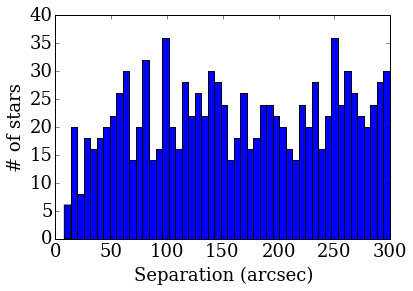

In [263]:
plt.hist(Pair_Dist, bins=50)
plt.xlabel('Separation (arcsec)')
plt.ylabel('# of stars')
plt.savefig('Pair Distances', dpi = 300)

In [264]:
AU_dist = Pair_Dist/3600.*np.pi/180. * Photo_Dist * 206265.
AU_dist

array([ 441714.45227769,  358716.34542759,    5866.80457718, ...,
        100398.0855863 ,   37015.16699374,   38414.68441494])

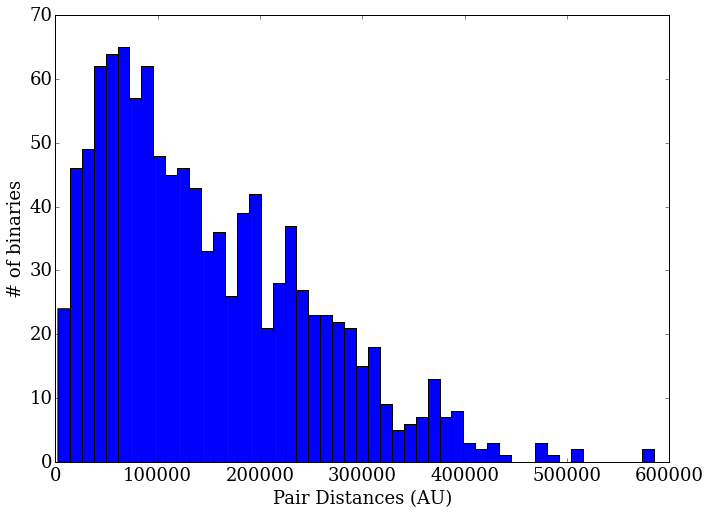

In [274]:
plt.figure(figsize=(11,8))
plt.hist((AU_dist), bins = 50)
plt.xlabel('Pair Distances (AU)')
plt.ylabel('# of binaries')
plt.savefig('AU_pairdist', dpi = 1000)


In [266]:
n = np.where((Lfl_Lbol[m][a]/Lfl_Lbol[m][b] > 0.80) & (Lfl_Lbol[m][a]/Lfl_Lbol[m][b] < 1.2))
print(np.size(n))
print(n)

7
(array([ 61,  86, 158, 165, 499, 503, 527]),)


/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/Riley/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:100: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


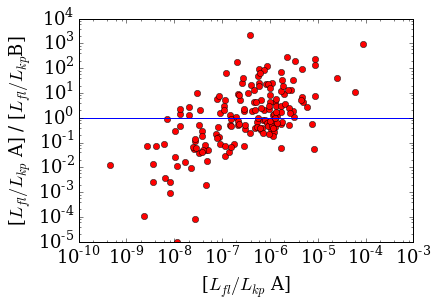

In [267]:
plt.plot(Lfl_Lbol[m][a], Lfl_Lbol[m][a]/Lfl_Lbol[m][b], 'ro')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[$L_{fl}/L_{kp}$ A]')
plt.ylabel('[$L_{fl}/L_{kp}$ A] / [$L_{fl}/L_{kp}$B]')
plt.plot([1e-10,1e-3],[1e0,1e0])
plt.ylim(-1e-6, 1e4)
plt.xlim(-1e-11, 1e-3)
plt.savefig('')

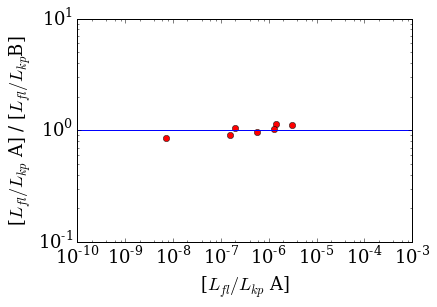

In [268]:
plt.plot(Lfl_Lbol[m][a][n], Lfl_Lbol[m][a][n]/Lfl_Lbol[m][b][n], 'ro')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('[$L_{fl}/L_{kp}$ A]')
plt.ylabel('[$L_{fl}/L_{kp}$ A] / [$L_{fl}/L_{kp}$B]')
plt.plot([1e-10,1e-3],[1e0,1e0])